In [68]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

Step 1: Import data from exported raw survey data

In [69]:
df = pd.read_csv("C:/Users/Owner/Desktop/AlaskaProject/seatsurveymodel.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,7,8,25,26,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240,252,264,276,283,288,289,290) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Step 2: Observe and summarize data

In [70]:
# Column names overview
df.columns

Index(['participant.id_in_session', 'participant.code', 'participant.label',
       'participant._is_bot', 'participant._index_in_pages',
       'participant._max_page_index', 'participant._current_app_name',
       'participant._current_page_name', 'participant.time_started',
       'participant.visited',
       ...
       'survey.1.player.gender', 'survey.1.player.feet',
       'survey.1.player.inches', 'survey.1.player.rt',
       'survey.1.player.bizlei', 'survey.1.player.seattype',
       'survey.1.player.section', 'survey.1.player.comment',
       'survey.1.group.id_in_subsession', 'survey.1.subsession.round_number'],
      dtype='object', length=293)

Step 3: Trim width of dataframe

In [71]:
# Drop irrelevant columns
df.drop(['participant.label','participant._is_bot','participant._max_page_index',
        'participant._current_page_name','participant.visited',
        'participant.mturk_worker_id','participant.mturk_assignment_id','participant.payoff',
        'session.label','session.mturk_HITId','session.mturk_HITGroupId','session.comment', 'session.is_demo',  'session.config.real_world_currency_per_point', 'session.config.participation_fee', 'randseq.1.player.role', 'randseq.1.player.payoff', 'randseq.1.group.id_in_subsession', 'randseq.1.subsession.round_number', 'survey.1.player.id_in_group', 'survey.1.player.role', 'survey.1.player.payoff'], inplace = True, axis = 1
       )

In [72]:
# Verify removal of specified columns
df.columns

Index(['participant.id_in_session', 'participant.code',
       'participant._index_in_pages', 'participant._current_app_name',
       'participant.time_started', 'session.code',
       'randseq.1.player.id_in_group', 'randseq.1.player.page_sequence',
       'randseq.1.player.choice1', 'randseq.1.player.choice2',
       ...
       'survey.1.player.gender', 'survey.1.player.feet',
       'survey.1.player.inches', 'survey.1.player.rt',
       'survey.1.player.bizlei', 'survey.1.player.seattype',
       'survey.1.player.section', 'survey.1.player.comment',
       'survey.1.group.id_in_subsession', 'survey.1.subsession.round_number'],
      dtype='object', length=271)

Step 4: Re-label fields

In [75]:
# Rename/shorten column names
df.rename(columns=
{
"session.code": "session_code",    
"participant.id_in_session": "id_in_session",
"participant._index_in_pages": "index_in_pages",
"participant._current_app_name": "current_app_name",
"participant.time_started": "time_started",
"randseq.1.player.id_in_group": "id_in_group",
"randseq.1.player.page_sequence": "page_sequence",

"randseq.1.player.choice1": "choice1",
"randseq.1.player.distance_1": "distance_1",
"randseq.1.player.time_1": "time_1",
"randseq.1.player.price_1": "price_1",
"randseq.1.player.row_1a": "rowA_1",
"randseq.1.player.row_1b": "rowB_1",
"randseq.1.player.col_1a": "colA_1",
"randseq.1.player.col_1b": "colB_1",
"randseq.1.player.price_1a": "priceA_1",
"randseq.1.player.price_1b": "priceB_1",
"randseq.1.player.legroom_1a": "legroomA_1",
"randseq.1.player.legroom_1b": "legroomB_1",

"randseq.1.player.choice2": "choice2",
"randseq.1.player.distance_2": "distance_2",
"randseq.1.player.time_2": "time_2",
"randseq.1.player.price_2": "price_2",
"randseq.1.player.row_2a": "rowA_2",
"randseq.1.player.row_2b": "rowB_2",
"randseq.1.player.col_2a": "colA_2",
"randseq.1.player.col_2b": "colB_2",
"randseq.1.player.price_2a": "priceA_2",
"randseq.1.player.price_2b": "priceB_2",
"randseq.1.player.legroom_2a": "legroomA_2",
"randseq.1.player.legroom_2b": "legroomB_2",

"randseq.1.player.choice3": "choice3",
"randseq.1.player.distance_3": "distance_3",
"randseq.1.player.time_3": "time_3",
"randseq.1.player.price_3": "price_3",
"randseq.1.player.row_3a": "rowA_3",
"randseq.1.player.row_3b": "rowB_3",
"randseq.1.player.col_3a": "colA_3",
"randseq.1.player.col_3b": "colB_3",
"randseq.1.player.price_3a": "priceA_3",
"randseq.1.player.price_3b": "priceB_3",
"randseq.1.player.legroom_3a": "legroomA_3",
"randseq.1.player.legroom_3b": "legroomB_3",

"randseq.1.player.choice4": "choice4",
"randseq.1.player.distance_4": "distance_4",
"randseq.1.player.time_4": "time_4",
"randseq.1.player.price_4": "price_4",
"randseq.1.player.row_4a": "rowA_4",
"randseq.1.player.row_4b": "rowB_4",
"randseq.1.player.col_4a": "colA_4",
"randseq.1.player.col_4b": "colB_4",
"randseq.1.player.price_4a": "priceA_4",
"randseq.1.player.price_4b": "priceB_4",
"randseq.1.player.legroom_4a": "legroomA_4",
"randseq.1.player.legroom_4b": "legroomB_4",

"randseq.1.player.choice_5": "choice5",
"randseq.1.player.distance_5": "distance_5",
"randseq.1.player.time_5": "time_5",
"randseq.1.player.price_5": "price_5",
"randseq.1.player.row_5a": "rowA_5",
"randseq.1.player.row_5b": "rowB_5",
"randseq.1.player.col_5a": "colA_5",
"randseq.1.player.col_5b": "colB_5",
"randseq.1.player.price_5a": "priceA_5",
"randseq.1.player.price_5b": "priceB_5",
"randseq.1.player.legroom_5a": "legroomA_5",
"randseq.1.player.legroom_5b": "legroomB_5",

"randseq.1.player.choice_6": "choice6",
"randseq.1.player.distance_6": "distance_6",
"randseq.1.player.time_6": "time_6",
"randseq.1.player.price_6": "price_6",
"randseq.1.player.row_6a": "rowA_6",
"randseq.1.player.row_6b": "rowB_6",
"randseq.1.player.col_6a": "colA_6",
"randseq.1.player.col_6b": "colB_6",
"randseq.1.player.price_6a": "priceA_6",
"randseq.1.player.price_6b": "priceB_6",
"randseq.1.player.legroom_6a": "legroomA_6",
"randseq.1.player.legroom_6b": "legroomB_6",

"randseq.1.player.choice_7": "choice7",
"randseq.1.player.distance_7": "distance_7",
"randseq.1.player.time_7": "time_7",
"randseq.1.player.price_7": "price_7",
"randseq.1.player.row_7a": "rowA_7",
"randseq.1.player.row_7b": "rowB_7",
"randseq.1.player.col_7a": "colA_7",
"randseq.1.player.col_7b": "colB_7",
"randseq.1.player.price_7a": "priceA_7",
"randseq.1.player.price_7b": "priceB_7",
"randseq.1.player.legroom_7a": "legroomA_7",
"randseq.1.player.legroom_7b": "legroomB_7",

"randseq.1.player.choice_8": "choice8",
"randseq.1.player.distance_8": "distance_8",
"randseq.1.player.time_8": "time_8",
"randseq.1.player.price_8": "price_8",
"randseq.1.player.row_8a": "rowA_8",
"randseq.1.player.row_8b": "rowB_8",
"randseq.1.player.col_8a": "colA_8",
"randseq.1.player.col_8b": "colB_8",
"randseq.1.player.price_8a": "priceA_8",
"randseq.1.player.price_8b": "priceB_8",
"randseq.1.player.legroom_8a": "legroomA_8",
"randseq.1.player.legroom_8b": "legroomB_8",

"randseq.1.player.choice_9": "choice9",
"randseq.1.player.distance_9": "distance_9",
"randseq.1.player.time_9": "time_9",
"randseq.1.player.price_9": "price_9",
"randseq.1.player.row_9a": "rowA_9",
"randseq.1.player.row_9b": "rowB_9",
"randseq.1.player.col_9a": "colA_9",
"randseq.1.player.col_9b": "colB_9",
"randseq.1.player.price_9a": "priceA_9",
"randseq.1.player.price_9b": "priceB_9",
"randseq.1.player.legroom_9a": "legroomA_9",
"randseq.1.player.legroom_9b": "legroomB_9",

"randseq.1.player.choice_10": "choice10",
"randseq.1.player.distance_10": "distance_10",
"randseq.1.player.time_10": "time_10",
"randseq.1.player.price_10": "price_10",
"randseq.1.player.row_10a": "rowA_10",
"randseq.1.player.row_10b": "rowB_10",
"randseq.1.player.col_10a": "colA_10",
"randseq.1.player.col_10b": "colB_10",
"randseq.1.player.price_10a": "priceA_10",
"randseq.1.player.price_10b": "priceB_10",
"randseq.1.player.legroom_10a": "legroomA_10",
"randseq.1.player.legroom_10b": "legroomB_10",

"randseq.1.player.choice_11": "choice11",
"randseq.1.player.distance_11": "distance_11",
"randseq.1.player.time_11": "time_11",
"randseq.1.player.price_11": "price_11",
"randseq.1.player.row_11a": "rowA_11",
"randseq.1.player.row_11b": "rowB_11",
"randseq.1.player.col_11a": "colA_11",
"randseq.1.player.col_11b": "colB_11",
"randseq.1.player.price_11a": "priceA_11",
"randseq.1.player.price_11b": "priceB_11",
"randseq.1.player.legroom_11a": "legroomA_11",
"randseq.1.player.legroom_11b": "legroomB_11",

"randseq.1.player.choice_12": "choice12",
"randseq.1.player.distance_12": "distance_12",
"randseq.1.player.time_12": "time_12",
"randseq.1.player.price_12": "price_12",
"randseq.1.player.row_12a": "rowA_12",
"randseq.1.player.row_12b": "rowB_12",
"randseq.1.player.col_12a": "colA_12",
"randseq.1.player.col_12b": "colB_12",
"randseq.1.player.price_12a": "priceA_12",
"randseq.1.player.price_12b": "priceB_12",
"randseq.1.player.legroom_12a": "legroomA_12",
"randseq.1.player.legroom_12b": "legroomB_12",

"randseq.1.player.choice_13": "choice13",
"randseq.1.player.distance_13": "distance_13",
"randseq.1.player.time_13": "time_13",
"randseq.1.player.price_13": "price_13",
"randseq.1.player.row_13a": "rowA_13",
"randseq.1.player.row_13b": "rowB_13",
"randseq.1.player.col_13a": "colA_13",
"randseq.1.player.col_13b": "colB_13",
"randseq.1.player.price_13a": "priceA_13",
"randseq.1.player.price_13b": "priceB_13",
"randseq.1.player.legroom_13a": "legroomA_13",
"randseq.1.player.legroom_13b": "legroomB_13",

"randseq.1.player.choice_14": "choice14",
"randseq.1.player.distance_14": "distance_14",
"randseq.1.player.time_14": "time_14",
"randseq.1.player.price_14": "price_14",
"randseq.1.player.row_14a": "rowA_14",
"randseq.1.player.row_14b": "rowB_14",
"randseq.1.player.col_14a": "colA_14",
"randseq.1.player.col_14b": "colB_14",
"randseq.1.player.price_14a": "priceA_14",
"randseq.1.player.price_14b": "priceB_14",
"randseq.1.player.legroom_14a": "legroomA_14",
"randseq.1.player.legroom_14b": "legroomB_14",

"randseq.1.player.choice_15": "choice15",
"randseq.1.player.distance_15": "distance_15",
"randseq.1.player.time_15": "time_15",
"randseq.1.player.price_15": "price_15",
"randseq.1.player.row_15a": "rowA_15",
"randseq.1.player.row_15b": "rowB_15",
"randseq.1.player.col_15a": "colA_15",
"randseq.1.player.col_15b": "colB_15",
"randseq.1.player.price_15a": "priceA_15",
"randseq.1.player.price_15b": "priceB_15",
"randseq.1.player.legroom_15a": "legroomA_15",
"randseq.1.player.legroom_15b": "legroomB_15",

"randseq.1.player.choice_16": "choice16",
"randseq.1.player.distance_16": "distance_16",
"randseq.1.player.time_16": "time_16",
"randseq.1.player.price_16": "price_16",
"randseq.1.player.row_16a": "rowA_16",
"randseq.1.player.row_16b": "rowB_16",
"randseq.1.player.col_16a": "colA_16",
"randseq.1.player.col_16b": "colB_16",
"randseq.1.player.price_16a": "priceA_16",
"randseq.1.player.price_16b": "priceB_16",
"randseq.1.player.legroom_16a": "legroomA_16",
"randseq.1.player.legroom_16b": "legroomB_16",

"randseq.1.player.choice_17": "choice17",
"randseq.1.player.distance_17": "distance_17",
"randseq.1.player.time_17": "time_17",
"randseq.1.player.price_17": "price_17",
"randseq.1.player.row_17a": "rowA_17",
"randseq.1.player.row_17b": "rowB_17",
"randseq.1.player.col_17a": "colA_17",
"randseq.1.player.col_17b": "colB_17",
"randseq.1.player.price_17a": "priceA_17",
"randseq.1.player.price_17b": "priceB_17",
"randseq.1.player.legroom_17a": "legroomA_17",
"randseq.1.player.legroom_17b": "legroomB_17",

"randseq.1.player.choice_18": "choice18",
"randseq.1.player.distance_18": "distance_18",
"randseq.1.player.time_18": "time_18",
"randseq.1.player.price_18": "price_18",
"randseq.1.player.row_18a": "rowA_18",
"randseq.1.player.row_18b": "rowB_18",
"randseq.1.player.col_18a": "colA_18",
"randseq.1.player.col_18b": "colB_18",
"randseq.1.player.price_18a": "priceA_18",
"randseq.1.player.price_18b": "priceB_18",
"randseq.1.player.legroom_18a": "legroomA_18",
"randseq.1.player.legroom_18b": "legroomB_18",

"randseq.1.player.choice_19": "choice19",
"randseq.1.player.distance_19": "distance_19",
"randseq.1.player.time_19": "time_19",
"randseq.1.player.price_19": "price_19",
"randseq.1.player.row_19a": "rowA_19",
"randseq.1.player.row_19b": "rowB_19",
"randseq.1.player.col_19a": "colA_19",
"randseq.1.player.col_19b": "colB_19",
"randseq.1.player.price_19a": "priceA_19",
"randseq.1.player.price_19b": "priceB_19",
"randseq.1.player.legroom_19a": "legroomA_19",
"randseq.1.player.legroom_19b": "legroomB_19",

"randseq.1.player.choice_20": "choice20",
"randseq.1.player.distance_20": "distance_20",
"randseq.1.player.time_20": "time_20",
"randseq.1.player.price_20": "price_20",
"randseq.1.player.row_20a": "rowA_20",
"randseq.1.player.row_20b": "rowB_20",
"randseq.1.player.col_20a": "colA_20",
"randseq.1.player.col_20b": "colB_20",
"randseq.1.player.price_20a": "priceA_20",
"randseq.1.player.price_20b": "priceB_20",
"randseq.1.player.legroom_20a": "legroomA_20",
"randseq.1.player.legroom_20b": "legroomB_20",

"randseq.1.player.choice_21": "choice21",
"randseq.1.player.distance_21": "distance_21",
"randseq.1.player.time_21": "time_21",
"randseq.1.player.price_21": "price_21",
"randseq.1.player.row_21a": "rowA_21",
"randseq.1.player.row_21b": "rowB_21",
"randseq.1.player.col_21a": "colA_21",
"randseq.1.player.col_21b": "colB_21",
"randseq.1.player.price_21a": "priceA_21",
"randseq.1.player.price_21b": "priceB_21",
"randseq.1.player.legroom_21a": "legroomA_21",
"randseq.1.player.legroom_21b": "legroomB_21",

"survey.1.player.age": "age",
"survey.1.player.gender": "gender",
"survey.1.player.feet": "height_feet",
"survey.1.player.inches": "height_inches",
"survey.1.player.rt": "annual_trip_freq",
"survey.1.player.bizlei": "percentage_biz",
"survey.1.player.seattype": "seat_type_preference",
"survey.1.player.section": "section_preference",
"survey.1.player.comment": "comment"

}, inplace=True)

Step 5: Remove incomplete survey responses

In [76]:
# Filter to keep only completed survey rows
filtered_df = df.query('current_app_name == "survey" and session_code == "s6qkz77s"')
filtered_df.info()
filtered_df.describe()
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 24 to 328
Columns: 271 entries, id_in_session to survey.1.subsession.round_number
dtypes: float64(26), int64(152), object(93)
memory usage: 291.1+ KB


,id_in_session,participant.code,index_in_pages,current_app_name,time_started,session_code,id_in_group,page_sequence,choice1,choice2,...,gender,height_feet,height_inches,annual_trip_freq,percentage_biz,seat_type_preference,section_preference,comment,survey.1.group.id_in_subsession,survey.1.subsession.round_number
24,1,ixi1jkao,23,survey,2021-04-15 23:36:35.096369+00:00,s6qkz77s,1,"[""Q21"", ""Q15"", ""Q4"", ""Q2"", ""Q19"", ""Q12"", ""Q10""...",Seat A,Seat B,...,Male,5.0,10.0,6.0,25.0,Window,Economy,NaN,1,1
28,5,p1n8e9va,23,survey,2021-04-16 01:35:43.132533+00:00,s6qkz77s,5,"[""Q7"", ""Q14"", ""Q9"", ""Q3"", ""Q18"", ""Q15"", ""Q21"",...",Seat A,Seat B,...,Male,5.0,8.0,5.0,40.0,Aisle,First,NaN,1,1
29,6,8j3yb395,23,survey,2021-04-16 01:36:06.063812+00:00,s6qkz77s,6,"[""Q3"", ""Q12"", ""Q1"", ""Q21"", ""Q17"", ""Q18"", ""Q11""...",Seat A,Seat B,...,Female,5.0,8.0,6.0,50.0,Window,Economy,NaN,1,1
38,15,pr29qnzv,23,survey,2021-04-16 02:40:31.624725+00:00,s6qkz77s,15,"[""Q14"", ""Q17"", ""Q3"", ""Q4"", ""Q9"", ""Q16"", ""Q8"", ...",Seat B,Seat B,...,Male,5.0,9.0,1.0,0.0,Window,Economy,How do you handle bias from people who have ne...,1,1
39,16,l0hz8k3t,23,survey,2021-04-16 02:55:05.067225+00:00,s6qkz77s,16,"[""Q15"", ""Q3"", ""Q14"", ""Q1"", ""Q20"", ""Q5"", ""Q9"", ...",Seat A,Seat B,...,Female,5.0,11.0,12.0,9.0,Middle,Premier,NaN,1,1


Now that the data is trimmed into a manageable size, we will transform/clean it to be used for modeling.
Each row in our current dataframe corresponds to a participant with over 100 columns of fields that span 21 questions. With the intent of using Logit Regression analysis for modeling the binary probability of choosing seat A or seat B (21 pairs), we decided to break each participant row into 21 rows with each row corresponding to a unique participant-question combination.
To do this, we utilized the Pandas wide_to_long function to transform the dataframe (see code below):

In [77]:
#Create 21 rows for each person
df_clean = pd.wide_to_long(filtered_df, ['choice','price_','distance_','time_','legroomA_','legroomB_','priceA_','priceB_',
                                         'colA_','colB_','rowA_','rowB_'], i = 'participant.code', 
                                           j = 'question').sort_values(['participant.code','question'])
print(df_clean)

                           annual_trip_freq  gender  \
participant.code question                             
0ae9sh8m         1                      5.0  Female   
                 2                      5.0  Female   
                 3                      5.0  Female   
                 4                      5.0  Female   
                 5                      5.0  Female   
...                                     ...     ...   
yp2s1c53         17                     2.0    Male   
                 18                     2.0    Male   
                 19                     2.0    Male   
                 20                     2.0    Male   
                 21                     2.0    Male   

                                               time_started  index_in_pages  \
participant.code question                                                     
0ae9sh8m         1         2021-04-16 21:55:56.329312+00:00              23   
                 2         2021-04-16 21:55:56.

Furthermore, to eliminate skewness/bias in our analysis, we decided to scale the continuous variables (i.e. legroom, price, height, age, distance).

[To confirm with Alaska]
There is uncertainty regarding whether to scale the incremental price versus scale the total price as it is a possibility that the survey respondent did not factor the base price into their decision-making. Another consideration is to classify age as a categorical variable instead of a continuous variable pending the age distribution of the survey respondents.

In [78]:
# Scaled Variables
#Legroom
df_clean["scaled_legroomA"] = preprocessing.scale(pd.to_numeric(df_clean["legroomA_"]))
df_clean["scaled_legroomB"] = preprocessing.scale(pd.to_numeric(df_clean["legroomB_"]))

#Total Price
df_clean["scaled_totalPriceA"] = preprocessing.scale((pd.to_numeric(df_clean["price_"]) + pd.to_numeric(df_clean["priceA_"])))
df_clean["scaled_totalPriceB"] = preprocessing.scale((pd.to_numeric(df_clean["price_"]) + pd.to_numeric(df_clean["priceB_"])))

#Variable Price
df_clean["scaled_varPriceA"] = preprocessing.scale(pd.to_numeric(df_clean["priceA_"]))
df_clean["scaled_varPriceB"] = preprocessing.scale(pd.to_numeric(df_clean["priceB_"]))

#Combined Height
df_clean["scaled_height"] = preprocessing.scale((df_clean["height_feet"]*12.0 + df_clean["height_inches"]))

#Age
df_clean["scaled_age"] = preprocessing.scale(df_clean["age"])

#Distance
df_clean["scaled_distance"] = preprocessing.scale(df_clean["distance_"])

Currently each row of data corresponds to a participant-question combination which consists of two seat attributes (Seat A and Seat B). Although we are interested in this pair-wise comparison as structured from the survey, de-coupling this would be helpful in modeling for the coefficients associated with variables such as rows, legroom, price, etc. Thus, the following code will double the rows where 42 rows (21 questions * 2 seats/question) correspond to each participant.

In [79]:
# Double the rows
df_clean2 = pd.DataFrame(np.repeat(df_clean.values,2,axis=0))
df_clean2.columns = df_clean.columns

In [80]:
df_clean2.reset_index()
df_clean2['seat_indicator'] = np.where((df_clean2.index%2) == 0, 'Seat A','Seat B')

In [81]:
#Seat String
df_clean2['seat'] = np.where(df_clean2['seat_indicator'] == 'Seat A',
                             df_clean2['rowA_'].astype(str) + df_clean2['colA_'],
                             df_clean2['rowB_'].astype(str) + df_clean2['colB_'])

In [82]:
#Binary Selection Variable
df_clean2['selection'] = np.where(df_clean2['choice']==df_clean2['seat_indicator'],'1','0')

In [83]:
#Create Selected and Alternative Columns
df_clean2['legroom'] = np.where(df_clean2['selection'] == '1', 
                       np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_legroomA'], df_clean2['scaled_legroomB']), 
                       np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_legroomA'], df_clean2['scaled_legroomB']))
df_clean2['legroom_alt'] = np.where(df_clean2['selection'] == '1', 
                           np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_legroomB'], df_clean2['scaled_legroomA']), 
                           np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_legroomB'], df_clean2['scaled_legroomA']))

df_clean2['price_total'] = np.where(df_clean2['selection'] == '1', 
                        np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_totalPriceA'], df_clean2['scaled_totalPriceB']), 
                         np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_totalPriceA'], df_clean2['scaled_totalPriceB']))
df_clean2['price_total_alt'] = np.where(df_clean2['selection'] == '1', 
                            np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_totalPriceB'], df_clean2['scaled_totalPriceA']), 
                             np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_totalPriceB'], df_clean2['scaled_totalPriceA']))

df_clean2['price_increase'] = np.where(df_clean2['selection'] == '1', 
                        np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_varPriceA'], df_clean2['scaled_varPriceB']), 
                         np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_varPriceA'], df_clean2['scaled_varPriceB']))
df_clean2['price_increase_alt'] = np.where(df_clean2['selection'] == '1', 
                            np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_varPriceB'], df_clean2['scaled_varPriceA']), 
                             np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_varPriceB'], df_clean2['scaled_varPriceA']))

df_clean2['row'] = np.where(df_clean2['selection'] == '1', 
                        np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['rowA_'], df_clean2['rowB_']), 
                         np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['rowA_'], df_clean2['rowB_']))
df_clean2['row_alt'] = np.where(df_clean2['selection'] == '1', 
                            np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['rowB_'], df_clean2['rowA_']), 
                             np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['rowB_'], df_clean2['rowA_']))

df_clean2['column'] = np.where(df_clean2['selection'] == '1', 
                        np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['colA_'], df_clean2['colB_']), 
                         np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['colA_'], df_clean2['colB_']))
df_clean2['column_alt'] = np.where(df_clean2['selection'] == '1', 
                            np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['colB_'], df_clean2['colA_']), 
                             np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['colB_'], df_clean2['colA_']))

In [84]:
#Drop Unnecessary Columns
df_clean2.drop(['legroomA_','legroomB_','scaled_legroomA','scaled_legroomB','priceA_','priceB_','scaled_varPriceA',
                'scaled_varPriceB','time_started','comment','survey.1.subsession.round_number',
               'survey.1.group.id_in_subsession','current_app_name','id_in_session','id_in_group','session_code',
               'index_in_pages','seat_indicator','colA_','colB_','rowA_','rowB_','scaled_totalPriceA','scaled_totalPriceB','age',
                'distance_','height_feet','height_inches','choice','price_','page_sequence','seat'], inplace = True, axis = 1)

In [85]:
#Order Columns
df_clean = df_clean2[['selection','row','row_alt','column','column_alt','legroom','legroom_alt',
                     'price_total','price_total_alt','price_increase','price_increase_alt','scaled_distance',
                      'time_','scaled_age','scaled_height','gender',
                      'percentage_biz','annual_trip_freq','seat_type_preference',
                      'section_preference']]

In [260]:
df_clean.to_csv('seatsurvey_clean2.csv', header=True)

In [86]:
df_clean_dummies = pd.get_dummies(df_clean, columns = ['column','column_alt','time_','gender','seat_type_preference','section_preference'] )

Next we will use the flat csv file to begin the modelling process. WE WILL CLEAN THIS UP FOR THE FINAL MODEL

In [18]:
df_clean_dummies.columns

Index(['selection', 'row', 'row_alt', 'legroom', 'legroom_alt', 'price_total',
       'price_total_alt', 'price_increase', 'price_increase_alt',
       'scaled_distance', 'scaled_age', 'scaled_height', 'percentage_biz',
       'annual_trip_freq', 'column_A', 'column_B', 'column_C', 'column_D',
       'column_E', 'column_F', 'column_alt_A', 'column_alt_B', 'column_alt_C',
       'column_alt_D', 'column_alt_E', 'column_alt_F', 'time__Daytime',
       'time__Red-eye', 'gender_Female', 'gender_Male', 'gender_Not Specified',
       'seat_type_preference_Aisle', 'seat_type_preference_Middle',
       'seat_type_preference_Window', 'section_preference_Economy',
       'section_preference_First', 'section_preference_Premier'],
      dtype='object')

In [19]:
df_clean_dummies.head

<bound method NDFrame.head of      selection row row_alt   legroom legroom_alt price_total price_total_alt  \
0            1  13      27  -1.18039   -0.210226   -0.977743       -0.986649   
1            0  27      13 -0.210226    -1.18039   -0.986649       -0.977743   
2            0  10      10 -0.210226   -0.449601     1.23817        0.988222   
3            1  10      10 -0.449601   -0.210226    0.988222         1.23817   
4            1  13      13  -1.18039   -0.947812   -0.227933     -0.00109214   
...        ...  ..     ...       ...         ...         ...             ...   
5749         1   8       6  0.281191     1.26495    -1.17891        -1.09399   
5750         0  16      11 -0.947812   -0.449601    0.555113        0.384716   
5751         1  11      16 -0.449601   -0.947812    0.384716        0.555113   
5752         1  10      23 -0.449601   -0.210226    -1.54467        -1.50382   
5753         0  23      10 -0.210226   -0.449601    -1.50382        -1.54467   

     pric

In [87]:
# Define output variable
y = df_clean_dummies.selection
# Drop output variable from dataset to form input vector
X = df_clean_dummies.drop('selection', axis=1)


# Use sklearn function train_test_split() to performa an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
# Verify shape of different sets
print("shape of original dataset :",df_clean_dummies.shape)
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (5754, 37)
shape of input - training set (4603, 36)
shape of output - training set (4603,)
shape of input - testing set (1151, 36)
shape of output - testing set (1151,)


In [88]:
# Create basic logistic regression model
log_reg = LogisticRegression(max_iter = 500)
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

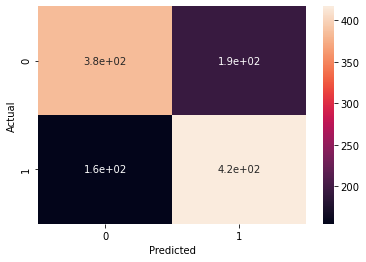

In [89]:
#Print Confusion Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [90]:
#Print Accuracy Score
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.6967854039965248


In [91]:
#Print Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.66      0.69       579
           1       0.68      0.73      0.70       572

    accuracy                           0.70      1151
   macro avg       0.70      0.70      0.70      1151
weighted avg       0.70      0.70      0.70      1151



In [92]:
params = log_reg.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [93]:
#Printing model parameters
print('Intercept: \n', log_reg.intercept_)
print('Coefficients: \n', log_reg.coef_)

Intercept: 
 [0.03233695]
Coefficients: 
 [[-8.77511927e-02  8.70095375e-02 -4.09005064e-01  3.70227251e-01
   4.21367701e-01 -3.95032037e-01 -1.20655242e-01  1.38628441e-01
  -3.11669748e-02  1.80242908e-02 -2.13932064e-02 -4.53654020e-04
  -1.41679250e-03  1.18911748e+00 -3.13232898e-01 -4.13273822e+00
   1.21284017e+00  1.04626856e+00  1.02310130e+00 -1.20987249e+00
   2.50584287e-01  4.15163739e+00 -1.18565831e+00 -9.81876647e-01
  -9.99457841e-01  2.83518947e-02 -2.99549516e-03  5.29453535e-03
   6.54999031e-02 -4.54380389e-02 -1.06847375e-01  2.06097974e-01
  -7.38941992e-02  5.19142401e-02 -1.90625258e-03 -2.46515880e-02]]


In [94]:
#Calculate odds ratio estimates
np.exp(log_reg.coef_)

array([[9.15988753e-01, 1.09090708e+00, 6.64310868e-01, 1.44806365e+00,
        1.52404457e+00, 6.73658457e-01, 8.86339480e-01, 1.14869721e+00,
        9.69313709e-01, 1.01818771e+00, 9.78834005e-01, 9.99546449e-01,
        9.98584211e-01, 3.28418157e+00, 7.31079626e-01, 1.60389007e-02,
        3.36302267e+00, 2.84700784e+00, 2.78180862e+00, 2.98235306e-01,
        1.28477588e+00, 6.35379516e+01, 3.05544971e-01, 3.74607433e-01,
        3.68078945e-01, 1.02875764e+00, 9.97008987e-01, 1.00530858e+00,
        1.06769263e+00, 9.55578809e-01, 8.98662821e-01, 1.22887360e+00,
        9.28769953e-01, 1.05328541e+00, 9.98095563e-01, 9.75649781e-01]])

In [96]:
log_odds = log_reg.coef_[0]

pd.DataFrame(log_odds,
          X_train.columns,
          columns=['coef'])\
          .sort_values(by='coef', ascending=False)

,coef
column_alt_C,4.151637
column_D,1.212840
column_A,1.189117
column_E,1.046269
column_F,1.023101
price_total,0.421368
legroom_alt,0.370227
column_alt_B,0.250584
seat_type_preference_Middle,0.206098
price_increase_alt,0.138628


In [97]:
odds = np.exp(log_reg.coef_[0])

pd.DataFrame(odds,
          X_train.columns,
          columns=['coef'])\
          .sort_values(by='coef', ascending=False)

,coef
column_alt_C,63.537952
column_D,3.363023
column_A,3.284182
column_E,2.847008
column_F,2.781809
price_total,1.524045
legroom_alt,1.448064
column_alt_B,1.284776
seat_type_preference_Middle,1.228874
price_increase_alt,1.148697
